In [2]:
import pandas as pd
import random as rnd
# import library for accuracy score
from sklearn.metrics import accuracy_score
# load the csv file
#importing test split library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('fraud_detect.csv');

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153753,99980,-0.460128,0.203036,0.469998,-0.877349,-0.333565,1.198391,1.088143,-0.303794,2.153779,...,0.006073,0.674304,-0.172643,-1.395636,-1.057282,0.487519,-0.252142,-0.041332,224.73,0
153754,99984,1.930509,0.589877,-0.573178,4.011452,0.646176,0.406016,0.003458,-0.104042,0.606845,...,-0.084729,0.160308,0.110852,0.603596,0.152945,0.028829,-0.056768,-0.050443,7.55,0
153755,99995,-0.080563,0.840885,-0.085326,-0.606702,0.879790,-0.493156,0.879652,-0.217802,1.515205,...,-0.479545,-1.013772,0.061588,-1.097930,-0.392758,0.157989,0.095614,0.062466,18.69,0
153756,99998,-1.730665,1.302833,0.397864,-0.445631,-0.773382,0.223966,-0.921886,1.329246,0.899559,...,0.370008,0.921796,-0.118298,0.797808,-0.386084,0.463457,-0.517093,-0.076129,29.90,0


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
153753,99980,-0.460128,0.203036,0.469998,-0.877349,-0.333565,1.198391,1.088143,-0.303794,2.153779,...,0.006073,0.674304,-0.172643,-1.395636,-1.057282,0.487519,-0.252142,-0.041332,224.73,0
153754,99984,1.930509,0.589877,-0.573178,4.011452,0.646176,0.406016,0.003458,-0.104042,0.606845,...,-0.084729,0.160308,0.110852,0.603596,0.152945,0.028829,-0.056768,-0.050443,7.55,0
153755,99995,-0.080563,0.840885,-0.085326,-0.606702,0.879790,-0.493156,0.879652,-0.217802,1.515205,...,-0.479545,-1.013772,0.061588,-1.097930,-0.392758,0.157989,0.095614,0.062466,18.69,0
153756,99998,-1.730665,1.302833,0.397864,-0.445631,-0.773382,0.223966,-0.921886,1.329246,0.899559,...,0.370008,0.921796,-0.118298,0.797808,-0.386084,0.463457,-0.517093,-0.076129,29.90,0
153757,99999,-0.309641,0.771215,0.679051,-1.069673,1.414042,-0.379638,1.315839,-0.449971,1.162826,...,-0.463374,-0.943621,-0.200362,-1.129995,-0.170943,0.087432,-0.149035,-0.106371,19.17,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,...,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000
mean,55219.166333,-0.234187,0.045504,0.604016,0.134835,-0.236612,0.069428,-0.103249,0.051217,-0.029171,...,-0.036877,-0.109254,-0.028362,0.011553,0.115682,0.022757,0.001876,0.002859,88.537235,0.002146
std,22658.988461,1.836892,1.620692,1.327202,1.352793,1.326851,1.290105,1.195012,1.239475,1.131997,...,0.742079,0.647129,0.585021,0.595752,0.448905,0.490984,0.392118,0.311831,246.097358,0.046278
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.462573,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,39394.000000,-1.021436,-0.539477,0.096945,-0.723555,-0.873953,-0.675633,-0.598162,-0.143827,-0.685397,...,-0.229086,-0.551681,-0.170680,-0.327445,-0.159352,-0.325815,-0.062807,-0.009576,5.860000,0.000000
50%,56784.000000,-0.258642,0.119851,0.704860,0.154723,-0.278833,-0.187899,-0.050370,0.072529,-0.116185,...,-0.059646,-0.085381,-0.041720,0.065159,0.154804,-0.056037,0.011011,0.022910,22.505000,0.000000
75%,73829.000000,1.164805,0.805848,1.337165,0.975383,0.295161,0.457292,0.435721,0.368644,0.571993,...,0.115133,0.321049,0.088913,0.411360,0.413009,0.286990,0.089884,0.078260,79.000000,0.000000
max,99999.000000,2.401777,18.902453,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153758 entries, 0 to 153757
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    153758 non-null  int64  
 1   V1      153758 non-null  float64
 2   V2      153758 non-null  float64
 3   V3      153758 non-null  float64
 4   V4      153758 non-null  float64
 5   V5      153758 non-null  float64
 6   V6      153758 non-null  float64
 7   V7      153758 non-null  float64
 8   V8      153758 non-null  float64
 9   V9      153758 non-null  float64
 10  V10     153758 non-null  float64
 11  V11     153758 non-null  float64
 12  V12     153758 non-null  float64
 13  V13     153758 non-null  float64
 14  V14     153758 non-null  float64
 15  V15     153758 non-null  float64
 16  V16     153758 non-null  float64
 17  V17     153758 non-null  float64
 18  V18     153758 non-null  float64
 19  V19     153758 non-null  float64
 20  V20     153758 non-null  float64
 21  V21     15

<Axes: >

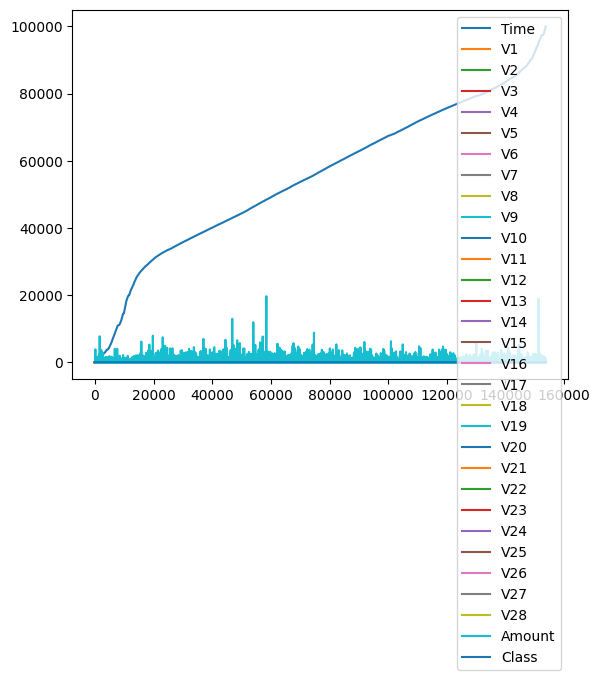

In [9]:
df.plot()

In [10]:
df.shape

(153758, 31)

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
fraud_cases = {0: "Not Fraud", 1: "Fraud"}
df.Class.value_counts().rename(index = fraud_cases)

Class
Not Fraud    153428
Fraud           330
Name: count, dtype: int64

In [13]:
y = df["Class"]
x = df.loc[:, df.columns != "Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = rnd.randint(10,100), stratify=y)# Implement the Gaussian Naive Bayes algorithm
model = GaussianNB()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
acc_gnb = round(accuracy_score(y_test, y_predict)*100, 2)
print(acc_gnb)

98.7


In [14]:
# Implement the Gaussian Naive Bayes algorithm
model = GaussianNB()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
acc_gnb = round(accuracy_score(y_test, y_predict)*100, 2)
print(acc_gnb)
print(x_train)

98.7
         Time        V1        V2        V3        V4        V5        V6  \
96238   65680  1.153263  0.165573  0.356198  0.588413 -0.340469 -0.424296   
10457   17048 -0.385270  0.880637  1.245041 -0.780480  0.403574 -1.298509   
137988  82430  1.349965 -0.513513  0.181483 -0.619392 -0.953778 -1.160850   
144946  86508 -0.231634 -0.101557  0.890811 -0.948625  1.345332  1.868931   
84953   60535 -0.303259  0.299558  0.973741  0.112371  0.148631  0.475788   
...       ...       ...       ...       ...       ...       ...       ...   
99650   67216  1.265334 -1.408596  0.852181 -1.357292 -1.905396 -0.411219   
74688   55705 -1.085057  1.439202 -1.126507 -0.255423  2.005149  3.346379   
75399   56047  1.520099 -1.206778  0.480991 -1.617158 -1.470054 -0.038867   
137970  82419  1.075210 -0.206144  1.297335  1.165393 -0.991094  0.330435   
106652  70056 -1.219670  0.999577  1.699284  1.026090 -0.671305  0.990758   

              V7        V8        V9  ...       V20       V21       V2

In [15]:
print(x_test)

         Time         V1         V2        V3        V4        V5        V6  \
70024   53679 -17.899004 -14.549238 -5.869432  4.774560  0.235016 -1.471499   
118539  75118   1.156875  -0.357583  0.479347  0.482916 -0.701251 -0.133634   
104014  68881  -1.281977   0.518172  0.899475 -1.083704 -0.286153 -1.404863   
20194   30849  -0.522905   0.177200  1.916045 -0.208067 -0.666973  1.873769   
51276   44869  -0.808662   0.867692  0.613193 -0.055535  1.156212 -1.761872   
...       ...        ...        ...       ...       ...       ...       ...   
28122   34867   1.167433   0.717808  0.227425  2.509845  0.232382 -0.558025   
144894  86470  -1.967666   2.008235 -1.717890 -0.832326  0.899948 -0.992464   
1771     1367  -0.183549   0.846339  0.770861 -0.078766  0.618273 -0.613900   
136049  81520  -0.517876   1.301368  1.814671  2.819944 -0.063020  1.125577   
39392   39815   1.287709   0.097217 -0.476443 -0.005028  0.053739 -1.088556   

              V7        V8        V9  ...       V20

In [16]:
print(y_train)

96238     0
10457     0
137988    0
144946    0
84953     0
         ..
99650     0
74688     0
75399     0
137970    0
106652    0
Name: Class, Length: 123006, dtype: int64


In [17]:
print(y_test)

70024     0
118539    0
104014    0
20194     0
51276     0
         ..
28122     0
144894    0
1771      0
136049    0
39392     0
Name: Class, Length: 30752, dtype: int64


In [18]:
#initialize logistic regression
logistic = LogisticRegression()

In [19]:
# train model using dataset
logistic.fit(x_train, y_train)
# prediction using test data
y_predict = logistic.predict(x_test)
# calculate model accuracy by comparing y_test and y_predict
acc_logisreg = round(accuracy_score(y_test, y_predict)*100, 2)
print(acc_logisreg)

99.85


C:\Users\karav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Implement the Gaussian Naive Bayes algorithm
model = GaussianNB()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
acc_gnb = round(accuracy_score(y_test, y_predict)*100, 2)
print(acc_gnb)

98.7


In [21]:
model= DecisionTreeClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
acc_dtc= round(accuracy_score(y_test, y_predict)*100, 2)
print(acc_dtc)

99.92


In [22]:
model = RandomForestClassifier() 
model.fit(x_train, y_train) 
y_predict = model.predict(x_test)
acc_rfc = round(accuracy_score(y_test, y_predict)*100, 2)
print(acc_rfc)

99.95


In [23]:
model = KNeighborsClassifier()
model.fit(x_train, y_train) 
y_predict = model.predict(x_test)
acc_knn = round(accuracy_score(y_test, y_predict)*100, 2)
print(acc_knn)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
models = pd.DataFrame({'model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors'], 'score': [acc_logisreg, acc_gnb, acc_dtc, acc_rfc, acc_knn]})
models.sort_values(by='score', ascending=False)

,model,score
3,Random Forest,99.94
2,Decision Tree,99.89
0,Logistic Regression,99.87
4,K-Nearest Neighbors,99.81
1,Naive Bayes,98.75


In [ ]:
x_train = df.balance.values.reshape(-1,1)
